In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import datetime as dt

In [13]:
tweet = pd.read_csv("china_082019_1_tweets_csv_hashed.csv")
user = pd.read_csv("china_082019_1_users_csv_hashed.csv")

In [14]:
tweet.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,436306424587890688,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,1.0,0.0,NaN,NaN,[443196382],NaN
1,582682975969624064,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,52.0,[],['http://goo.gl/32K38q'],[],NaN
2,582997936541278208,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,[],[],[116351908],NaN
3,580404049901670400,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,[],['http://goo.gl/iC1GM9'],[],NaN
4,199007241142149121,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,NaN,['http://migre.me/8Ycqm'],NaN,NaN


In [15]:
user.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
0,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,NaN,NaN,NaN,1,52,2017-08-30,zh-cn
1,919755217121316864,ailaiyi5,wuming11xia,NaN,NaN,NaN,0,0,2017-10-16,zh-cn
2,747292706536226816,牛小牛,gurevadona88,NaN,NaN,NaN,23949,52,2016-06-27,zh-cn
3,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,NaN,NaN,NaN,17,34,2016-08-08,es
4,907348345563303940,lishuishi,lishuishi,NaN,NaN,NaN,0,0,2017-09-11,zh-tw


In [18]:
print(tweet.shape)
print(user.shape)

(1906831, 31)
(744, 10)


In [19]:
tweet.describe()

,tweetid,follower_count,following_count,in_reply_to_tweetid,quoted_tweet_tweetid,retweet_tweetid,quote_count,reply_count,like_count,retweet_count
count,1.906831e+06,1.906831e+06,1.906831e+06,1.785020e+05,9.513300e+04,3.579360e+05,1.888906e+06,1.888906e+06,1.888906e+06,1.888906e+06
mean,7.206899e+17,2.444543e+04,1.350040e+04,5.869991e+17,8.621642e+17,6.013256e+17,7.288346e-03,8.859573e-02,4.557506e-02,1.496379e-01
std,2.729179e+17,2.948863e+04,9.531729e+03,3.471806e+17,8.568681e+16,2.745685e+17,4.159671e-01,9.644296e-01,1.644062e+00,3.454932e+00
min,8.126727e+08,0.000000e+00,0.000000e+00,8.237374e+08,1.847925e+15,1.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.789587e+17,1.089500e+04,9.050000e+03,2.715412e+17,8.376187e+17,4.314172e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.170222e+17,1.355300e+04,1.359200e+04,6.053735e+17,8.417812e+17,5.771102e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.716381e+17,1.890000e+04,1.460600e+04,9.028863e+17,8.525281e+17,8.528084e+17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.154216e+18,1.701550e+05,3.175200e+04,1.153504e+18,1.154193e+18,1.154179e+18,1.930000e+02,3.260000e+02,1.159000e+03,3.344000e+03


In [20]:
user.dtypes

userid                      object
user_display_name           object
user_screen_name            object
user_reported_location      object
user_profile_description    object
user_profile_url            object
follower_count               int64
following_count              int64
account_creation_date       object
account_language            object
dtype: object

In [46]:


user['account_creation_date'].nunique()
#user['create_m'] = pd.to_datetime(user['account_creation_date']).dt.month

289

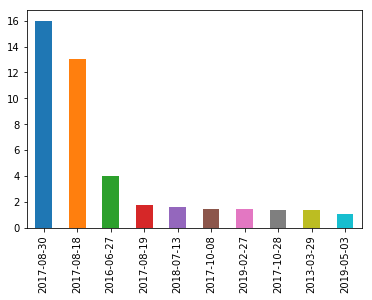

In [49]:
fig = plt.figure()
((pd.value_counts(user['account_creation_date'])[:10])/744*100).plot.bar()


In [6]:
df.info

<bound method DataFrame.info of                      tweetid      userid user_display_name user_screen_name  \
0         436306424587890688   206027550        The Flecha        nessniven   
1         582682975969624064   206027550        The Flecha        nessniven   
2         582997936541278208   206027550        The Flecha        nessniven   
3         580404049901670400   206027550        The Flecha        nessniven   
4         199007241142149121   206027550        The Flecha        nessniven   
5         580032285535289344   206027550        The Flecha        nessniven   
6         582942608370065408   206027550        The Flecha        nessniven   
7         580097979954151424   206027550        The Flecha        nessniven   
8        1051828667058290688   620912741               曲剑明      qujianming1   
9         530322332007407616   620912741               曲剑明      qujianming1   
10        551775574973100033   620912741               曲剑明      qujianming1   
11        5263618951

In [11]:
df['userid'].nunique()

699

In [ ]:
df.groupby('userid')['tweetid'].count()